# Online shopping Customer Segmentation
# **Problem statement**

# 1: Segment (Group/Cluster) customer on basis of RFM (Recency, Frequency, Monetary) 
# 2: Segment (Group/Cluster) Identify trends for Day, Month, Season, Time by Invoice count
# 3.Top 10 selling product 
# 4 Best product at country level.
# 5 FINDING CUSTOMER VALUATION.

In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

In [14]:
df=pd.read_excel("Online_shopping.xlsx")
df.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
df.shape

(541909, 9)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   lower        1816 non-null    object        
 3   Description  540455 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [7]:
# 1- Total 8 feature and this one is clustering problem so no target variable column is there.Data set consists of 541909 rows
# 2- InvoiceDate column is already in datetime format
# 3- Has null values in few features as well
# 4- In cistomerID coloum we have null values.

In [17]:
df.isnull().sum()/len(df1)*100

InvoiceNo       0.000000
StockCode       0.000000
lower          99.664888
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [18]:
df.duplicated().sum() # Ignoring duplicates

5268

In [19]:
df1=df.copy()

In [20]:
df1=df1.dropna(subset=['CustomerID'])

In [21]:
df1.isnull().sum()

InvoiceNo           0
StockCode           0
lower          405387
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID          0
Country             0
dtype: int64

# 3.Top 10 selling product 

In [102]:
df1.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [103]:
df1.shape

(541909, 9)

In [104]:
df_top=df1.copy()
df_top=df_top.drop(['lower','CustomerID'],axis=1)

In [105]:
# Finding the Total Sale by multiplying the Quantity and Unit Price
df_top['Total']=df_top['Quantity']*df_top['UnitPrice']
df_top.drop(['UnitPrice'],axis=1,inplace=True)
df_top.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,United Kingdom,20.34


In [106]:
#Finding the Overall Sale of a Product using Pivot Table
df_top_table=df_top.pivot_table(values='Total',index=['Description'],aggfunc='sum',sort=True).reset_index()
df_top_table.head()

,Description,Total
0,20713,0.00
1,4 PURPLE FLOCK DINNER CANDLES,290.80
2,50'S CHRISTMAS GIFT BAG LARGE,2341.13
3,DOLLY GIRL BEAKER,2882.50
4,I LOVE LONDON MINI BACKPACK,1628.17


In [107]:
#Extracting top 10 rows by sorting the 'Total' column in descending order
df_top_table.sort_values(by='Total',ascending=False).head(10)

,Description,Total
1098,DOTCOM POSTAGE,206245.48
2915,REGENCY CAKESTAND 3 TIER,164762.19
3918,WHITE HANGING HEART T-LIGHT HOLDER,99668.47
2471,PARTY BUNTING,98302.98
1866,JUMBO BAG RED RETROSPOT,92356.03
2803,RABBIT NIGHT LIGHT,66756.59
2753,POSTAGE,66230.64
2439,PAPER CHAIN KIT 50'S CHRISTMAS,63791.94
244,ASSORTED COLOUR BIRD ORNAMENT,58959.73
773,CHILLI LIGHTS,53768.06


In [108]:
#We can also use groupby function 
df_top.groupby('Description').sum().reset_index().sort_values(by='Total',ascending=False).head(10)

,Description,Quantity,Total
1098,DOTCOM POSTAGE,707,206245.48
2915,REGENCY CAKESTAND 3 TIER,13033,164762.19
3918,WHITE HANGING HEART T-LIGHT HOLDER,35317,99668.47
2471,PARTY BUNTING,18022,98302.98
1866,JUMBO BAG RED RETROSPOT,47363,92356.03
2803,RABBIT NIGHT LIGHT,30680,66756.59
2753,POSTAGE,3003,66230.64
2439,PAPER CHAIN KIT 50'S CHRISTMAS,18902,63791.94
244,ASSORTED COLOUR BIRD ORNAMENT,36381,58959.73
773,CHILLI LIGHTS,10229,53768.06


In [109]:
#Now we can groupby top ten items purchased high in quantity.
df_top.groupby('Description').sum().reset_index().sort_values(by='Quantity',ascending=False).head(10)

,Description,Quantity,Total
4009,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847,13587.93
1866,JUMBO BAG RED RETROSPOT,47363,92356.03
244,ASSORTED COLOUR BIRD ORNAMENT,36381,58959.73
2740,POPCORN HOLDER,36334,33969.46
2395,PACK OF 72 RETROSPOT CAKE CASES,36039,21059.72
3918,WHITE HANGING HEART T-LIGHT HOLDER,35317,99668.47
2803,RABBIT NIGHT LIGHT,30680,66756.59
2161,MINI PAINT SET VINTAGE,26437,16810.42
2361,PACK OF 12 LONDON TISSUES,26315,7972.76
2393,PACK OF 60 PINK PAISLEY CAKE CASES,24753,12189.47


In [110]:
#we can see the stock items returned,damaged etc most
df_top.groupby('Description').sum().reset_index().sort_values(by='Quantity').head(10)

,Description,Quantity,Total
4167,printing smudges/thrown away,-19200,0.0
3740,"Unsaleable, destroyed.",-15644,0.0
4116,check,-12030,0.0
2796,Printing smudges/thrown away,-9058,0.0
1123,Damaged,-7540,0.0
4194,throw away,-5368,0.0
4126,damages,-4338,0.0
4147,incorrect stock entry.,-4320,0.0
4195,thrown away,-4110,0.0
4219,wrongly marked. 23343 in box,-3100,0.0


Most Selling product in the mall is 'DotCom Postage' as per Total Sale amount

As per qty ,'WORLD WAR 2 GLIDERS ASSTD DESIGNS' is most sale product

Most returned product is 'printing smudges/thrown away'

# 4 Best product at country level.

Now we are going to find the highest selling items countrywise.
For this first we will group by country and find the product with highest selling value of each country

In [111]:
df4=df_top.pivot_table(values='Total',index=['Country','Description'],aggfunc='sum',sort=False).reset_index()
df4.head()

,Country,Description,Total
0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,93953.07
1,United Kingdom,WHITE METAL LANTERN,7684.25
2,United Kingdom,CREAM CUPID HEARTS COAT HANGER,5379.17
3,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,15779.79
4,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,21013.43


In [112]:
# After identifying the sales of each product at a country level, picking the highest sale value by grouping
df_Cntry=df4.groupby(by='Country').max()
df_Cntry=df_Cntry.reset_index()
df_Cntry.head()

,Country,Total
0,Australia,3375.84
1,Austria,1456.00
2,Bahrain,120.00
3,Belgium,4248.00
4,Brazil,175.20


Now to get the description of the maximum ssale value product countrywise with description -
First we will add one more column of primay key in both tables df_country and df4 then merge df_country with df4 
to identify the Prodcut name(description) on basis of the Sale and Country Value


In [113]:
# Creating a column 'Primary key' by merging two columns for the initial table
df_Cntry['Primary']=df_Cntry['Country']+' '+(df_Cntry['Total'].map(str))  
df_Cntry.head(10)

,Country,Total,Primary
0,Australia,3375.84,Australia 3375.84
1,Austria,1456.00,Austria 1456.0
2,Bahrain,120.00,Bahrain 120.0
3,Belgium,4248.00,Belgium 4248.0
4,Brazil,175.20,Brazil 175.2
5,Canada,550.94,Canada 550.94
6,Channel Islands,517.80,Channel Islands 517.8
7,Cyprus,580.00,Cyprus 580.0
8,Czech Republic,70.80,Czech Republic 70.80000000000001
9,Denmark,734.40,Denmark 734.4000000000001


In [114]:
# Creating a coloumn 'Primary key' by merging two columns for the initial table
df4['Primary']=df4['Country']+' '+(df4['Total'].map(str))
df4.head()

,Country,Description,Total,Primary
0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,93953.07,United Kingdom 93953.07
1,United Kingdom,WHITE METAL LANTERN,7684.25,United Kingdom 7684.25
2,United Kingdom,CREAM CUPID HEARTS COAT HANGER,5379.17,United Kingdom 5379.17
3,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,15779.79,United Kingdom 15779.79
4,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,21013.43,United Kingdom 21013.43


In [115]:
# Merging these two tables using left join
df_mrg=df_Cntry.merge(df4,how='left',on='Primary')
df_mrg.head()

,Country_x,Total_x,Primary,Country_y,Description,Total_y
0,Australia,3375.84,Australia 3375.84,Australia,RABBIT NIGHT LIGHT,3375.84
1,Austria,1456.00,Austria 1456.0,Austria,POSTAGE,1456.00
2,Bahrain,120.00,Bahrain 120.0,Bahrain,ICE CREAM SUNDAE LIP GLOSS,120.00
3,Belgium,4248.00,Belgium 4248.0,Belgium,POSTAGE,4248.00
4,Brazil,175.20,Brazil 175.2,Brazil,REGENCY CAKESTAND 3 TIER,175.20


In [116]:
# Extract the final table from df_mrg and rename the columns showcasing the best product at country level
df_Cntry_prd=df_mrg[['Country_x','Description','Total_x']]
df_Cntry_prd.rename(columns={'Country_x':'Country','Total_x':'Total_Sales'},inplace=True)
df_Cntry_prd.sort_values(by='Total_Sales',ascending =False)

,Country,Description,Total_Sales
38,United Kingdom,DOTCOM POSTAGE,206245.48
14,Germany,POSTAGE,20821.00
13,France,POSTAGE,15065.00
24,Netherlands,RABBIT NIGHT LIGHT,9568.48
10,EIRE,REGENCY CAKESTAND 3 TIER,7442.85
20,Japan,RABBIT NIGHT LIGHT,6087.79
33,Spain,POSTAGE,5852.00
3,Belgium,POSTAGE,4248.00
35,Switzerland,POSTAGE,3880.00
12,Finland,POSTAGE,3472.00


So we can see that the best product at country level.
DOTCOM POSTAGE of sales value 206245.48 being the costiest item of UK.

Now identifing the Top 10 Country with the product of highest sales value

In [117]:
Cn_sale= df4.groupby(['Country']).agg(Sum_of_Sales=('Total','sum')).sort_values(by = 'Sum_of_Sales', ascending = False).reset_index()
Cn_sale

,Country,Sum_of_Sales
0,United Kingdom,8187806.364
1,Netherlands,284661.540
2,EIRE,263276.820
3,Germany,221698.210
4,France,197403.900
5,Australia,137077.270
6,Switzerland,56385.350
7,Spain,54774.580
8,Belgium,40910.960
9,Sweden,36595.910


<AxesSubplot:xlabel='Country', ylabel='Sum_of_Sales'>

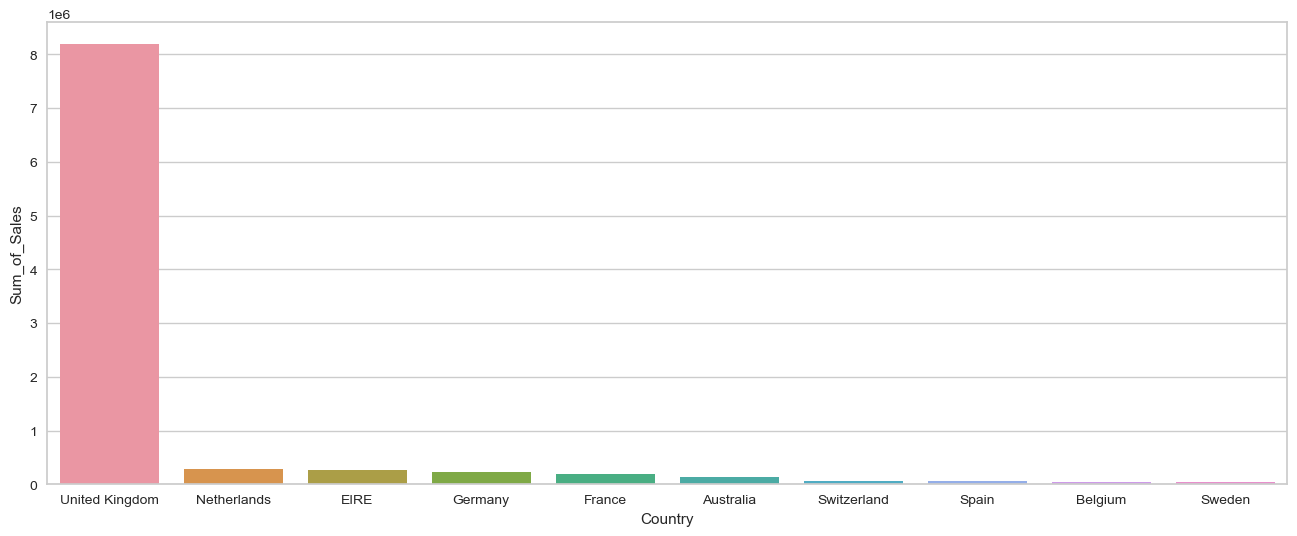

In [118]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(data=Cn_sale.head(10), x="Country", y="Sum_of_Sales")

# UK has very large sale compared to other countries and 'DOTCOM POSTAGE' is the most sold product in UK